<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Normalized-rates" data-toc-modified-id="Normalized-rates-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Normalized rates</a></span></li><li><span><a href="#De-meaned-rates" data-toc-modified-id="De-meaned-rates-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>De-meaned rates</a></span></li></ul></div>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [10]:
# graph a single county
def graph_county(df, name, years):
    county = df[df["County"] == name].iloc[0][1:]
    plt.plot(years, county, label=name)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.xticks(years)
    
def clean_files(df):
    file = pd.read_csv(df, index_col = 0)
    file.index = file.index.str.strip()
    file = file[["2017", "2018", "2019", "2020", "2021"]]
    return file
    
red_colors = [(0.3 + i/1.5/58, 0, 0) for i in range(58)]
blue_colors = [(0,0, 0.3 + i/1.5/58) for i in range(58)]
green_colors = [(0, 0.3 + i/1.5/58,0) for i in range(58)]

In [11]:
# remove commas from data
def remove_commas(string):
    return re.sub(",", "", string)
    
# remove percentage signs from data
def remove_percentage(string):
    return re.sub("%", "", string)
    
def remove_dollar(string):
    return re.sub("\$", "", string)

In [18]:
# get files, clean them up
def clean_files(df, control):
    file = pd.read_csv(df, index_col = 0)
    file.index = file.index.str.strip()
    if not (control):
        file = file[["2017", "2018", "2019", "2020", "2021"]]
    return file
    
violent_crime = clean_files("data_files/violent_crime_rates.csv", control=False)
property_crime = clean_files("data_files/property_crime_rates.csv", control=False)
unemployment = clean_files("data_files/unemployment.csv", control=False)
health_factors = clean_files("data_files/health_factors.csv", control=False)
health_outcomes = clean_files("data_files/health_outcomes.csv", control=False)
od_deaths = clean_files("data_files/od_death_rate_final.csv", control=False)
free_reduced_meals = clean_files("data_files/free_reduced_meals.csv", control=False)
graduation_rates = clean_files("data_files/graduation_rates.csv", control=False)
population = clean_files("data_files/population.csv", control=False)
wealth_metrics = clean_files("data_files/wealth_metrics.csv", control=True)
urban_rural = clean_files("data_files/urban_rural.csv", control=True)
political_affiliation = clean_files("data_files/political_affiliation.csv", control=True)

In [19]:
for col in population.columns:
    population.loc[:,col] = population[col].astype(str).apply(remove_commas).astype(int)
    
for col in free_reduced_meals.columns:
    free_reduced_meals.loc[:,col] = free_reduced_meals[col].astype(str).apply(remove_percentage).astype(float)
    
for col in wealth_metrics.columns:
    wealth_metrics.loc[:,col] = wealth_metrics[col].astype(str).apply(remove_dollar)
    wealth_metrics.loc[:,col] = wealth_metrics[col].astype(str).apply(remove_commas)

# convert crime rates from numbers to per capita
violent_crime = violent_crime.astype(int)
per_capita_crime = violent_crime / population

property_crime = property_crime.astype(int)
per_capita_property_crime = property_crime / population

urban_rural.columns = ['total_units', 'urban_units', 'rural_units']

urban_rural.urban_units = urban_rural.urban_units / urban_rural.total_units
urban_rural.rural_units = urban_rural.rural_units / urban_rural.total_units


/var/folders/3l/phmqvp1s6y5_l56qp_wwfrb80000gn/T/ipykernel_4171/1304406304.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  population.loc[:,col] = population[col].astype(str).apply(remove_commas).astype(int)
/var/folders/3l/phmqvp1s6y5_l56qp_wwfrb80000gn/T/ipykernel_4171/1304406304.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  free_reduced_meals.loc[:,col] = free_reduced_meals[col].astype(str).apply(remove_percentage).astype(float)


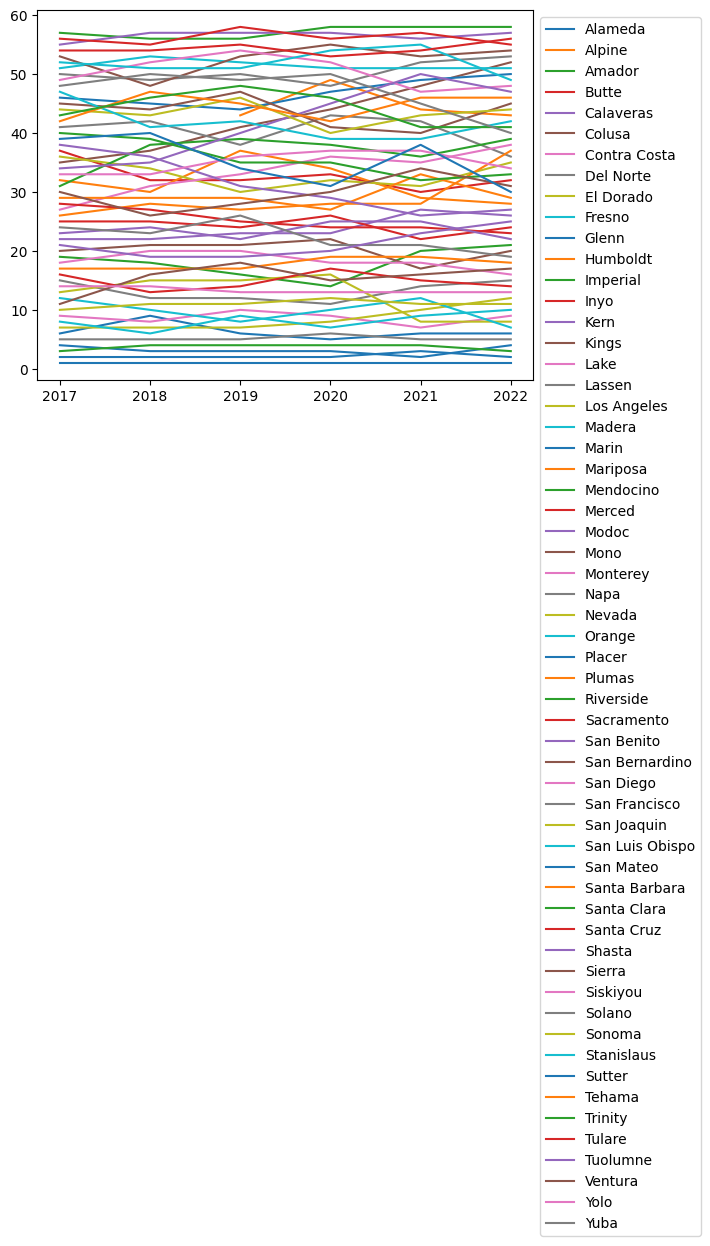

In [20]:
# Grab the data from health factors CSV file, strip any excess whitespace, and plot it:
health_factors = pd.read_csv("data_files/health_factors.csv")
health_factors["County"] = health_factors["County"].str.strip()
health_factors = health_factors.set_index("County")
health_factors.transpose().plot()
plt.legend(bbox_to_anchor=(1, 1))

## Normalized rates

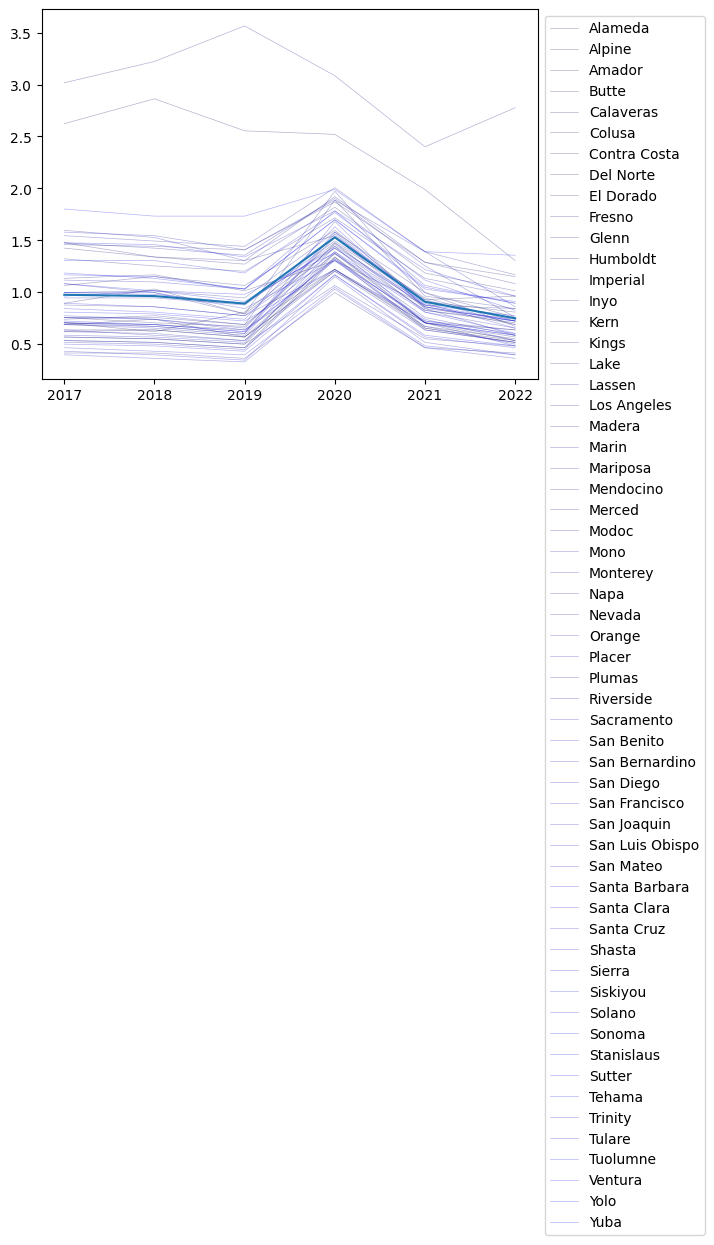

In [21]:
unemployment_rate = pd.read_csv("data_files/unemployment.csv", index_col = 'County')

unemployment_rate.index = unemployment_rate.index.str.strip()
(unemployment_rate/(unemployment_rate.mean().mean())).transpose().plot(color=blue_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(unemployment_rate.mean() / unemployment_rate.mean().mean())

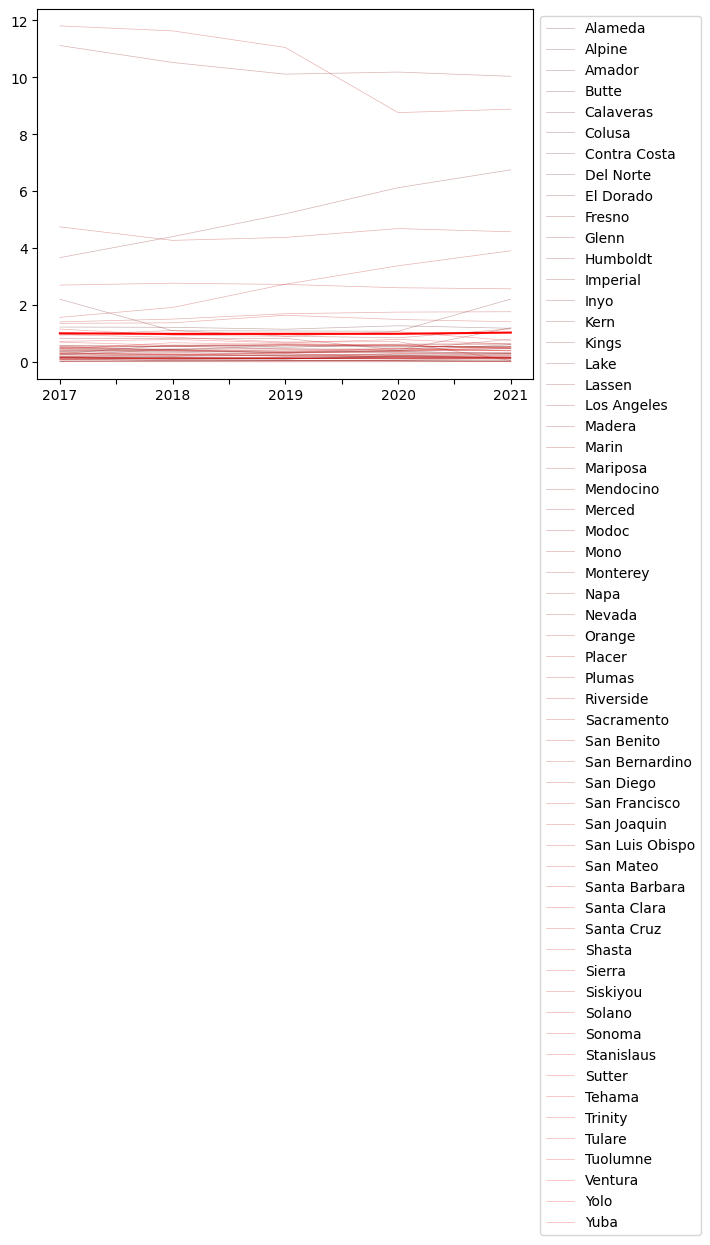

In [22]:
(violent_crime/(violent_crime.mean().mean())).transpose().plot(color=red_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(violent_crime.mean() / violent_crime.mean().mean(), c='r')

## De-meaned rates

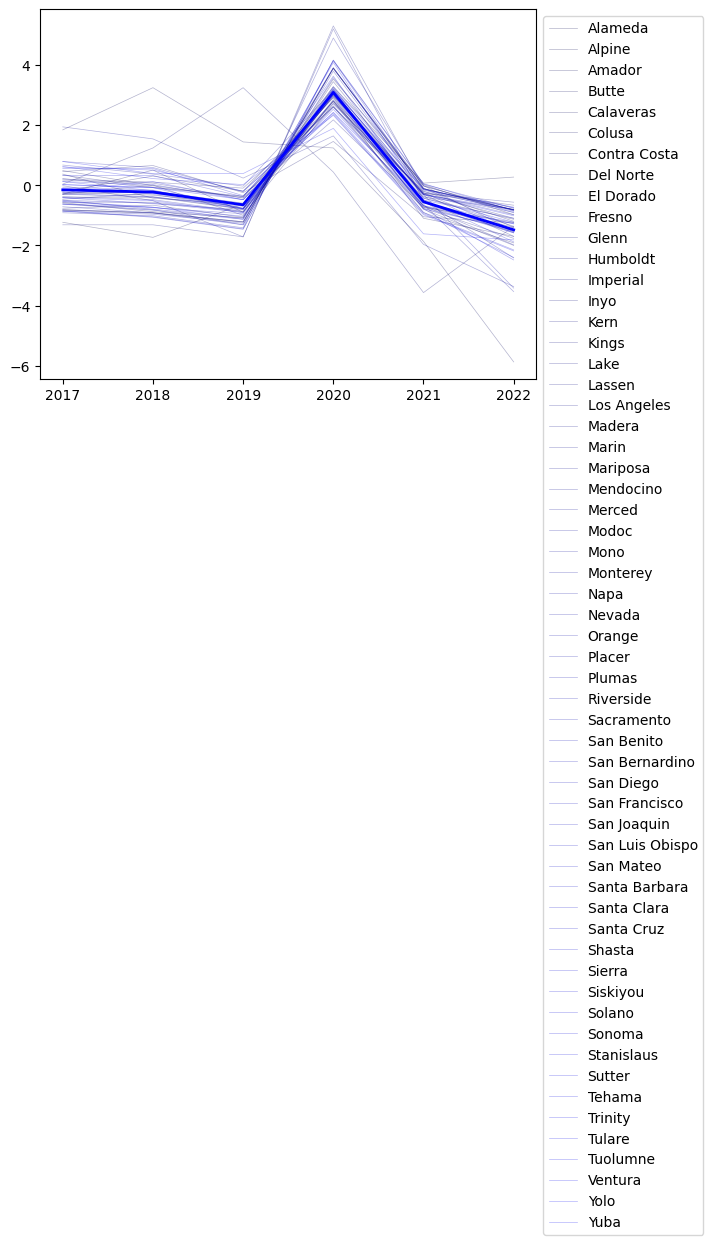

In [23]:
unemployment_rate = pd.read_csv("data_files/unemployment.csv", index_col = 'County')
unemployment_rate.index = unemployment_rate.index.str.strip()

demeaned_unemployment = (unemployment_rate.transpose() - unemployment_rate.mean(axis=1))
demeaned_unemployment.plot(color=blue_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(demeaned_unemployment.transpose().mean(), linewidth=2, c='b')

(-300.0, 300.0)

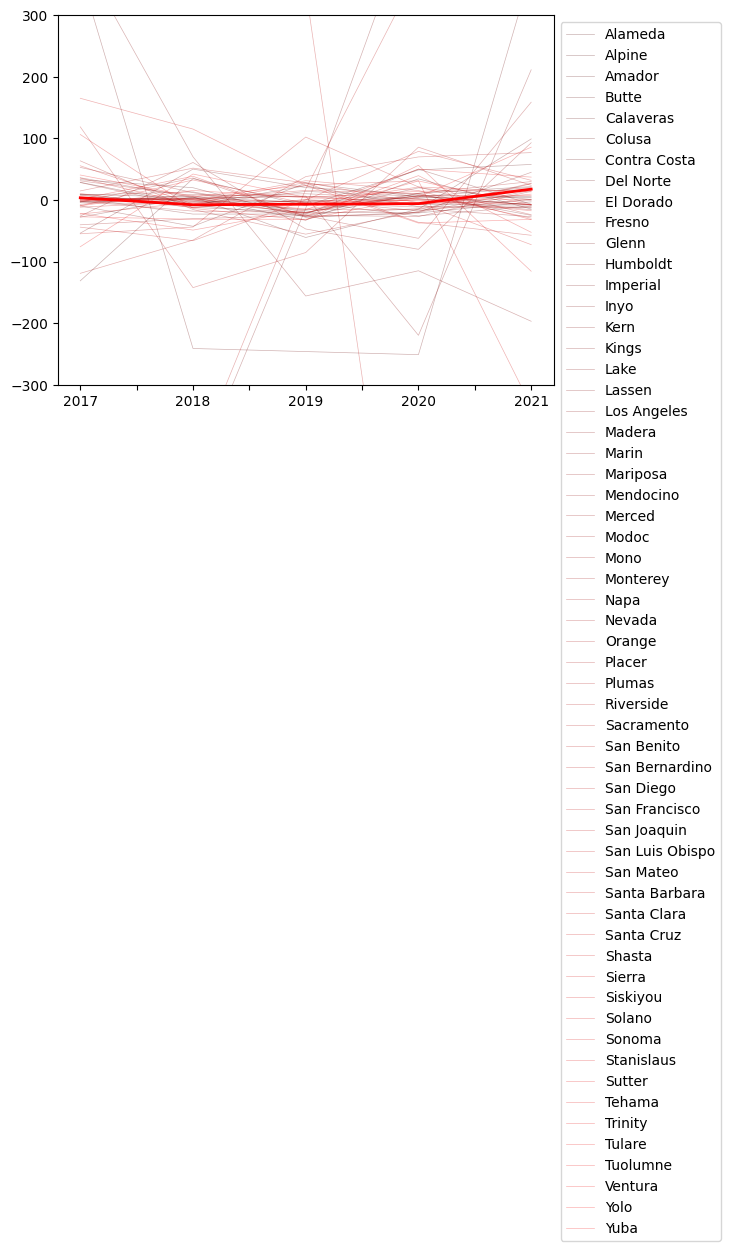

In [25]:
demeaned_violent_crime = (violent_crime.transpose() - violent_crime.mean(axis=1))
demeaned_violent_crime.plot(color=red_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(demeaned_violent_crime.transpose().mean(), linewidth=2, c='r')
plt.ylim([-300,300])

Text(0, 0.5, 'de-meaned violent crime rate (crimes/1000 people/year)')

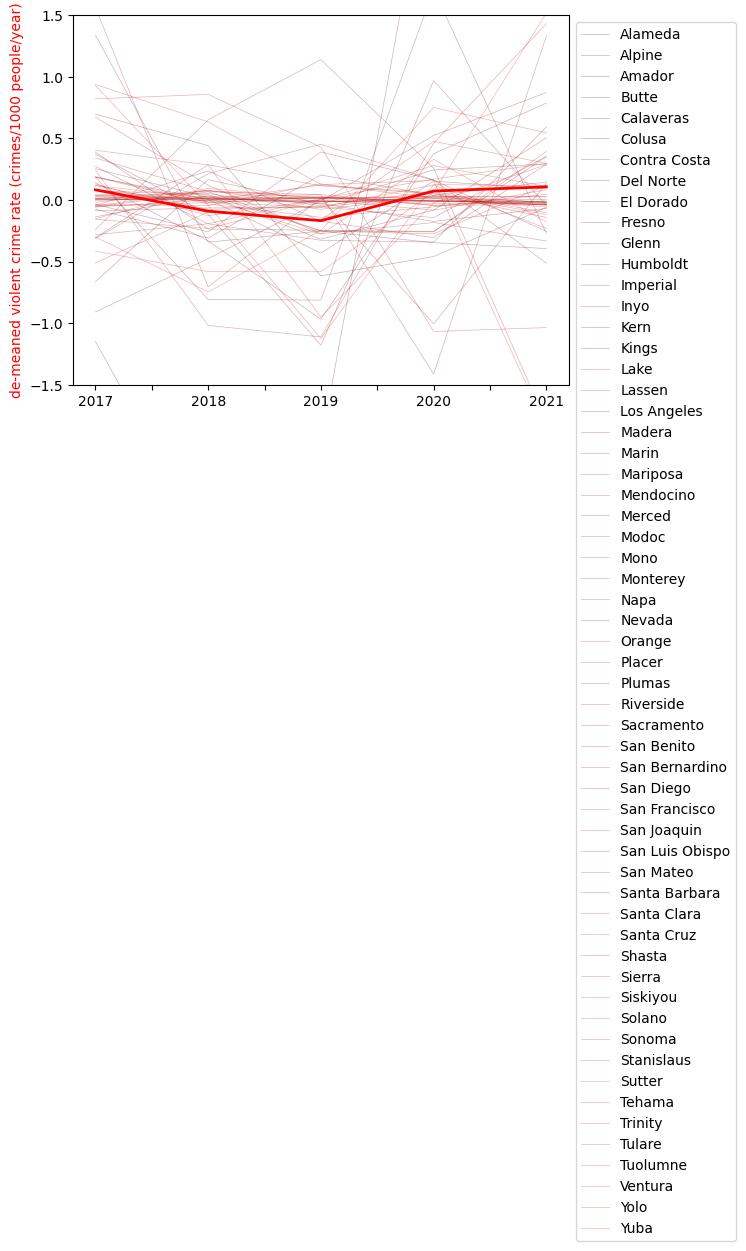

In [32]:
demeaned_per_capita_violent_crime = (per_capita_crime.transpose() - per_capita_crime.mean(axis=1)) * 1000
demeaned_per_capita_violent_crime.plot(color=red_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(demeaned_per_capita_violent_crime.transpose().mean(), linewidth=2, c='r')
plt.ylim([-0001.5,0001.5])
plt.ylabel('de-meaned violent crime rate (crimes/1000 people/year)', c='r')


(-1000.0, 1000.0)

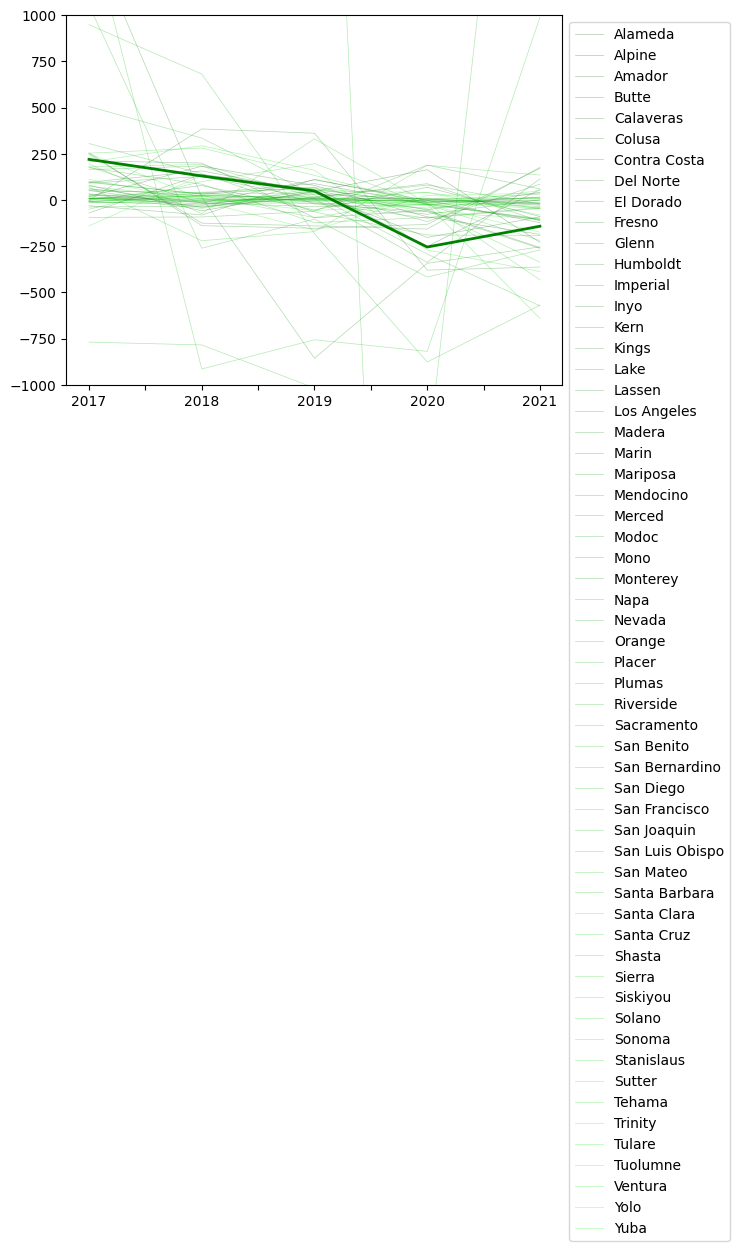

In [26]:
demeaned_property_crime = (property_crime.transpose() - property_crime.mean(axis=1))
demeaned_property_crime.plot(color=green_colors, alpha=0.3, linewidth=0.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.plot(demeaned_property_crime.transpose().mean(), linewidth=2, c='g')
plt.ylim([-1000,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'de-meaned unemployment rate (%)')

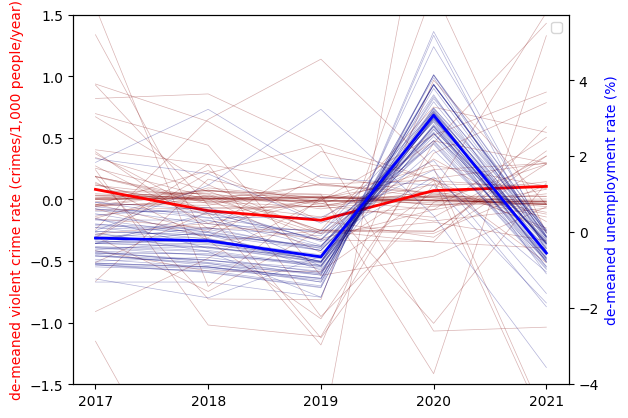

In [34]:
fig,ax = plt.subplots()

for county in demeaned_per_capita_violent_crime.columns:
    ax.plot(demeaned_per_capita_violent_crime[county], color=(0.5,0,0), alpha=0.3, linewidth=0.5)
ax.legend(bbox_to_anchor=(1, 1))
ax.plot(demeaned_per_capita_violent_crime.transpose().mean(), linewidth=2, c='r')
ax.set_ylim([-1.5,1.5])
ax.set_ylabel('de-meaned violent crime rate (crimes/1,000 people/year)', c='r')

ax2 = ax.twinx()
unemployment_rate = pd.read_csv("data_files/unemployment.csv", index_col = 'County')
unemployment_rate.index = unemployment_rate.index.str.strip()
demeaned_unemployment = (unemployment_rate.transpose() - unemployment_rate.mean(axis=1)).loc[
    ['2017','2018','2019','2020','2021']
]
for county in demeaned_unemployment.columns:
    ax2.plot(demeaned_unemployment[county], color=(0,0,0.5), alpha=0.3, linewidth=0.5)
ax2.plot(demeaned_unemployment.transpose().mean(), linewidth=2, c='b')
ax2.set_ylabel('de-meaned unemployment rate (%)', c='b')

/var/folders/3l/phmqvp1s6y5_l56qp_wwfrb80000gn/T/ipykernel_4171/3558810793.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  demeaned_population = (population.transpose() - population.mean(axis=1)).mean(axis=1)
/var/folders/3l/phmqvp1s6y5_l56qp_wwfrb80000gn/T/ipykernel_4171/3558810793.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  demeaned_wealth_metrics = (wealth_metrics.transpose() - wealth_metrics.mean(axis=1)).mean(axis=1)


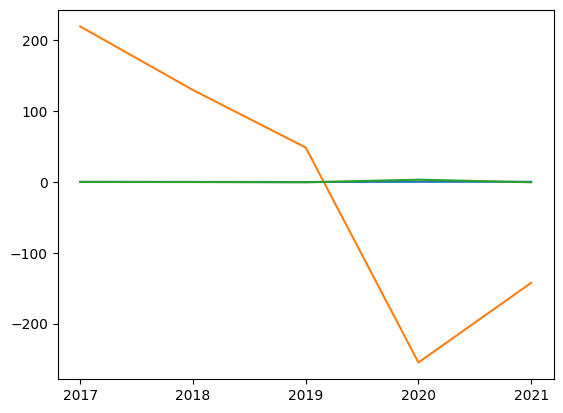

In [50]:
demeaned_od_deaths = (od_deaths.transpose() - od_deaths.mean(axis=1)).mean(axis=1)
demeaned_graduation_rates = (graduation_rates.transpose() - graduation_rates.mean(axis=1)).mean(axis=1)
demeaned_population = (population.transpose() - population.mean(axis=1)).mean(axis=1)
demeaned_wealth_metrics = (wealth_metrics.transpose() - wealth_metrics.mean(axis=1)).mean(axis=1)
demeaned_urban_rural = (urban_rural.transpose() - urban_rural.mean(axis=1)).mean(axis=1)

plt.plot(demeaned_per_capita_violent_crime.transpose().mean())
plt.plot(demeaned_property_crime.transpose().mean())
plt.plot(demeaned_unemployment.transpose().mean())
plt.plot(demeaned_od_deaths)
plt.plot(demeaned_graduation_rates)
plt.plot(demeaned_population)
plt.plot(demeaned_population)
plt.plot(demeaned_wealth_metrics)
plt.plot(demeaned_urban_rural)


In [41]:
od_deaths

,2017,2018,2019,2020,2021
County,,,,,
Alameda,7.060,11.460,14.797,18.790,18.258
Alpine,0.000,0.000,97.278,89.445,86.730
Amador,8.775,17.773,32.820,17.440,27.203
Butte,18.935,25.515,23.188,31.253,53.328
Calaveras,10.512,15.348,26.348,19.605,26.160
Colusa,4.907,0.000,18.365,23.025,4.585
Contra Costa,9.745,13.735,14.188,20.012,22.468
Del Norte,20.733,3.592,25.095,28.600,35.742
El Dorado,13.970,17.308,16.715,17.890,21.645
